Seed used for random values: 44


<ipython-input-1-bf9f5725699f>:97: RuntimeWarning: divide by zero encountered in log10
  D[j] = np.log10(np.sqrt(np.sum(diff**2, axis=0)))
<ipython-input-1-bf9f5725699f>:97: RuntimeWarning: divide by zero encountered in log10
  D[j] = np.log10(np.sqrt(np.sum(diff**2, axis=0)))
<ipython-input-1-bf9f5725699f>:97: RuntimeWarning: divide by zero encountered in log10
  D[j] = np.log10(np.sqrt(np.sum(diff**2, axis=0)))


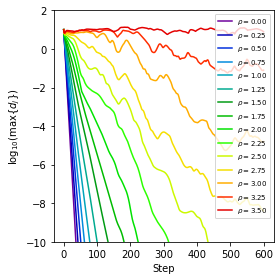

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import random
import matplotlib.colors as colors
import matplotlib.cm as cmx
# !/usr/bin/env python
# -*- coding: utf-8 -*-
import os
import time
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

NCURVES = 15
values = range(NCURVES)
cm = plt.get_cmap('nipy_spectral') 
cNorm  = colors.Normalize(vmin=-2, vmax=values[-1]+2)  # 设置离散 value 的取值范围
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

path = 'result/contraction_analysis'
if not os.path.exists(path):
    os.makedirs(path)
    

# system_name = 'rossler'
#     'rabinovich_fabrikant',
system_name =    'Lorenz'
#     'chua',


def set_seed(seed=None):
    """Making the seed (for random values) variable if None"""

    # Set the seed
    if seed is None:
        import time
        seed = int((time.time()*10**6) % 10**12)
        
    try:
        random.seed(seed) 
        np.random.seed(seed)
        print("Seed used for random values:", seed)
    except:
        print("!!! WARNING !!!: Seed was not set correctly.")
    return seed

U = np.loadtxt('dataset/matlab_gendata/'+system_name+'.csv', delimiter=',').T
T = 600
# generate the ESN reservoir
inSize = U.shape[0]
resSize = 100 #reservoir size
a = 0.5# leaking rate
spectral_radius = 1
reg = 1e-8 # regularization coefficient 
input_scaling = 1

# change the seed, reservoir performances should be averaged accross at least 20 random instances (with the same set of parameters)
our_seed = 44  # Choose a seed or None
set_seed(our_seed) 

# generation of random weights
Win = (np.random.rand(resSize,1+inSize)-0.5) * input_scaling
W = np.random.rand(resSize,resSize)-0.5
W0 = W.copy()

# Computing spectral radius...
rhoW = np.sqrt(max(abs(np.linalg.eig(W@W.T)[0]))) #maximal eigenvalue

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
# initials = [np.zeros([resSize,1]), np.ones([resSize,1]), -np.ones([resSize,1])]
initials = [np.zeros([resSize,1])] + [ np.sign(np.random.rand(resSize,1)-0.5) for _ in range(100)]
N_inits = len(initials)
for i,K in enumerate([0.25*k for k in range(15)]):
#     W = W0/rhoW*(K-1+a)/a 
    W = W0/rhoW*K

    result = []
    for j in range(N_inits):

        X = np.zeros((resSize,T))
        x = initials[j]
        for t in range(T):
            u = U[:,t:t+1]
            res_in = np.dot( Win, np.vstack((1,u))) + np.dot( W, x )
            res_out = np.tanh(res_in)
            x = (1-a) * x + a * res_out 
            X[:,t:t+1] = x

        result.append(np.hstack([initials[j],X]))
    D = np.zeros((N_inits, T+1))
    for j in range(1,N_inits):
        diff = result[j] - result[0]
        D[j] = np.log10(np.sqrt(np.sum(diff**2, axis=0)))
    
    colorVal = scalarMap.to_rgba(values[i])
    ax.plot(np.max(D[1:],axis=0), color=colorVal, label=r'$\rho={:.2f}$'.format(K))
    ax.set_ylim([-10, 2])
    
ax.legend(loc='upper right',fontsize=7)
ax.set_xlabel('Step')
ax.set_ylabel(r'$\log_{10} (\max\{d_j\})$')
# ax.set_title(r'$N_x=100, \alpha={}, b={}$'.format(a,input_scaling))
plt.tight_layout()
plt.savefig(path+'/d_vs_rho.pdf')

Seed used for random values: 44


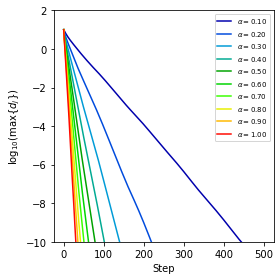

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

NCURVES = 10
values = range(NCURVES)
cm = plt.get_cmap('nipy_spectral') 
cNorm  = colors.Normalize(vmin=-2, vmax=values[-1]+2)  # 设置离散 value 的取值范围
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)


T = 500
# generate the ESN reservoir
inSize = U.shape[0]
resSize = 100 #reservoir size
a = 0.5# leaking rate
K = 1
input_scaling = 1

# change the seed, reservoir performances should be averaged accross at least 20 random instances (with the same set of parameters)
our_seed = 44  # Choose a seed or None
set_seed(our_seed) 

# generation of random weights
Win = (np.random.rand(resSize,1+inSize)-0.5) * input_scaling
W = np.random.rand(resSize,resSize)-0.5
W0 = W.copy()

# Computing spectral radius...
rhoW = np.sqrt(max(abs(np.linalg.eig(W@W.T)[0]))) #maximal eigenvalue

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
initials = [np.zeros([resSize,1])] + [ np.sign(np.random.rand(resSize,1)-0.5) for _ in range(100)]
N_inits = len(initials)
for i,a in enumerate([0.1*i for i in range(1,11)]):
    W = W0/rhoW*K

    result = []
    for j in range(N_inits):

        X = np.zeros((resSize,T))
        x = initials[j]
        for t in range(T):
            u = U[:,t:t+1]
            res_in = np.dot( Win, np.vstack((1,u))) + np.dot( W, x )
            res_out = np.tanh(res_in)
            x = (1-a) * x + a * res_out 
            X[:,t:t+1] = x

        result.append(np.hstack([initials[j],X]))
    D = np.zeros((N_inits, T+1))
    for j in range(1,N_inits):
        diff = result[j] - result[0]
        D[j] = np.log10(np.sqrt(np.sum(diff**2, axis=0)))
    
    colorVal = scalarMap.to_rgba(values[i])
    ax.plot(np.max(D[1:],axis=0), color=colorVal, label=r'$\alpha={:.2f}$'.format(a))
    ax.set_ylim([-10, 2])
    
ax.legend(loc='upper right',fontsize=7)
ax.set_xlabel('Step')
ax.set_ylabel(r'$\log_{10} (\max\{d_j\})$')
# ax.set_title(r'$N_x=100, \alpha={}, b={}$'.format(a,input_scaling))
plt.tight_layout()
plt.savefig(path+'/d_vs_alpha.pdf')

Seed used for random values: 44


<ipython-input-4-376d9c59ca1f>:56: RuntimeWarning: divide by zero encountered in log10
  D[j] = np.log10(np.sqrt(np.sum(diff**2, axis=0)))
<ipython-input-4-376d9c59ca1f>:56: RuntimeWarning: divide by zero encountered in log10
  D[j] = np.log10(np.sqrt(np.sum(diff**2, axis=0)))


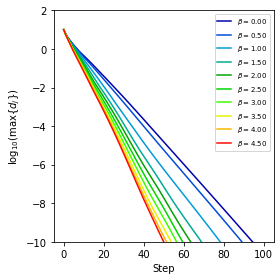

In [4]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

NCURVES = 10
values = range(NCURVES)
cm = plt.get_cmap('nipy_spectral') 
cNorm  = colors.Normalize(vmin=-2, vmax=values[-1]+2)  # 设置离散 value 的取值范围
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)


T = 100
# generate the ESN reservoir
inSize = U.shape[0]
resSize = 100 #reservoir size
a = 0.5# leaking rate
K = 1
input_scaling = 1

# change the seed, reservoir performances should be averaged accross at least 20 random instances (with the same set of parameters)
our_seed = 44  # Choose a seed or None
set_seed(our_seed) 

# generation of random weights
Win0 = (np.random.rand(resSize,1+inSize)-0.5)
W = np.random.rand(resSize,resSize)-0.5
rhoW = np.sqrt(max(abs(np.linalg.eig(W@W.T)[0]))) #maximal eigenvalue
W = W/rhoW*K

# Computing spectral radius...


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
initials = [np.zeros([resSize,1])] + [ np.sign(np.random.rand(resSize,1)-0.5) for _ in range(100)]
N_inits = len(initials)

for i,input_scaling  in enumerate([0.5*i for i in range(10)]):
    # generation of random weights
    Win = Win0 * input_scaling

    result = []
    for j in range(N_inits):

        X = np.zeros((resSize,T))
        x = initials[j]
        for t in range(T):
            u = U[:,t:t+1]
            res_in = np.dot( Win, np.vstack((1,u))) + np.dot( W, x )
            res_out = np.tanh(res_in)
            x = (1-a) * x + a * res_out 
            X[:,t:t+1] = x

        result.append(np.hstack([initials[j],X]))
    D = np.zeros((N_inits, T+1))
    for j in range(1,N_inits):
        diff = result[j] - result[0]
        D[j] = np.log10(np.sqrt(np.sum(diff**2, axis=0)))
    
    colorVal = scalarMap.to_rgba(values[i])
    ax.plot(np.max(D[1:],axis=0), color=colorVal, label=r'$\beta={:.2f}$'.format(input_scaling))
    ax.set_ylim([-10, 2])
    
ax.legend(loc='upper right',fontsize=7)
ax.set_xlabel('Step')
ax.set_ylabel(r'$\log_{10} (\max\{d_j\})$')
# ax.set_title(r'$N_x=100, \alpha={}, b={}$'.format(a,input_scaling))
plt.tight_layout()
plt.savefig(path+'/d_vs_inputscaling.pdf')

Seed used for random values: 44


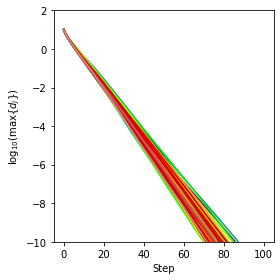

In [109]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

NCURVES = 100
values = range(NCURVES)
cm = plt.get_cmap('nipy_spectral') 
cNorm  = colors.Normalize(vmin=-2, vmax=values[-1]+2)  # 设置离散 value 的取值范围
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)


T = 100
# generate the ESN reservoir
inSize = U.shape[0]
resSize = 100 #reservoir size
a = 0.5# leaking rate
K = 1
input_scaling = 1

# change the seed, reservoir performances should be averaged accross at least 20 random instances (with the same set of parameters)
our_seed = 44  # Choose a seed or None
set_seed(our_seed) 

# generation of random weights
Win0 = (np.random.rand(resSize,1+inSize)-0.5)
Win = Win0 * input_scaling


# Computing spectral radius...


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
initials = [np.zeros([resSize,1])] + [ np.sign(np.random.rand(resSize,1)-0.5) for _ in range(100)]
N_inits = len(initials)

for i  in range(100):
    # generation of random weights
    W = np.random.rand(resSize,resSize)-0.5
    rhoW = np.sqrt(max(abs(np.linalg.eig(W@W.T)[0]))) #maximal eigenvalue
    W = W/rhoW*K


    result = []
    for j in range(N_inits):

        X = np.zeros((resSize,T))
        x = initials[j]
        for t in range(T):
            u = U[:,t:t+1]
            res_in = np.dot( Win, np.vstack((1,u))) + np.dot( W, x )
            res_out = np.tanh(res_in)
            x = (1-a) * x + a * res_out 
            X[:,t:t+1] = x

        result.append(np.hstack([initials[j],X]))
    D = np.zeros((N_inits, T+1))
    for j in range(1,N_inits):
        diff = result[j] - result[0]
        D[j] = np.log10(np.sqrt(np.sum(diff**2, axis=0)))
    
    colorVal = scalarMap.to_rgba(values[i])
    ax.plot(np.max(D[1:],axis=0), color=colorVal, label=r's=$W$ sample {}'.format(i))
    ax.set_ylim([-10, 2])
    
# ax.legend(loc='upper right',fontsize=7)
ax.set_xlabel('Step')
ax.set_ylabel(r'$\log_{10} (\max\{d_j\})$')
# ax.set_title(r'$N_x=100, \alpha={}, b={}$'.format(a,input_scaling))
plt.tight_layout()
plt.savefig(path+'/d_vs_W.pdf')

Seed used for random values: 44


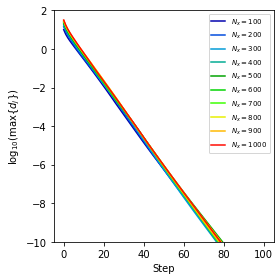

In [99]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

NCURVES = 10
values = range(NCURVES)
cm = plt.get_cmap('nipy_spectral') 
cNorm  = colors.Normalize(vmin=-2, vmax=values[-1]+2)  # 设置离散 value 的取值范围
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)


T = 100
# generate the ESN reservoir
inSize = U.shape[0]
resSize = 100 #reservoir size
a = 0.5# leaking rate
K = 1
input_scaling = 1

# change the seed, reservoir performances should be averaged accross at least 20 random instances (with the same set of parameters)
our_seed = 44  # Choose a seed or None
set_seed(our_seed) 



# Computing spectral radius...


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))


for i,resSize  in enumerate([100*i for i in range(1,11)]):
    # generation of random weights
    # generation of random weights
    Win0 = (np.random.rand(resSize,1+inSize)-0.5)
    Win = Win0 * input_scaling

    W = np.random.rand(resSize,resSize)-0.5
    rhoW = np.sqrt(max(abs(np.linalg.eig(W@W.T)[0]))) #maximal eigenvalue
    W = W/rhoW*K
    
    initials = [np.zeros([resSize,1])] + [ np.sign(np.random.rand(resSize,1)-0.5) for _ in range(100)]
    N_inits = len(initials)


    result = []
    for j in range(N_inits):

        X = np.zeros((resSize,T))
        x = initials[j]
        for t in range(T):
            u = U[:,t:t+1]
#             print(W.shape, Win.shape,x.shape)
            res_in = np.dot( Win, np.vstack((1,u))) + np.dot( W, x )
            res_out = np.tanh(res_in)
            x = (1-a) * x + a * res_out 
            X[:,t:t+1] = x

        result.append(np.hstack([initials[j],X]))
    D = np.zeros((N_inits, T+1))
    for j in range(1,N_inits):
        diff = result[j] - result[0]
        D[j] = np.log10(np.sqrt(np.sum(diff**2, axis=0)))
    
    colorVal = scalarMap.to_rgba(values[i])
    ax.plot(np.max(D[1:],axis=0), color=colorVal, label=r'$N_x= {}$'.format(resSize))
    ax.set_ylim([-10, 2])
    
ax.legend(loc='upper right',fontsize=7)
ax.set_xlabel('Step')
ax.set_ylabel(r'$\log_{10} (\max\{d_j\})$')
# ax.set_title(r'$N_x=100, \alpha={}, b={}$'.format(a,input_scaling))
plt.tight_layout()
plt.savefig(path+'/d_vs_Nx.pdf')

Seed used for random values: 44


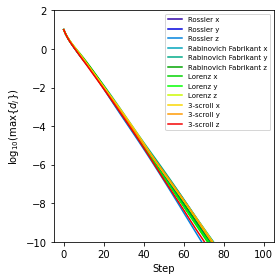

In [120]:
import matplotlib.colors as colors
import matplotlib.cm as cmx


systems = [
    'Rossler',
    'Rabinovich Fabrikant',
    'Lorenz',
    'Chua'
    ]

dims = ['x','y','z']

NCURVES = 12
values = range(NCURVES)
cm = plt.get_cmap('nipy_spectral') 
cNorm  = colors.Normalize(vmin=-2, vmax=values[-1]+2)  # 设置离散 value 的取值范围
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)


T = 100
# generate the ESN reservoir
inSize =1
resSize = 100 #reservoir size
a = 0.5# leaking rate
K = 1
input_scaling = 1

# change the seed, reservoir performances should be averaged accross at least 20 random instances (with the same set of parameters)
our_seed = 44  # Choose a seed or None
set_seed(our_seed) 

Win0 = (np.random.rand(resSize,1+inSize)-0.5)
Win = Win0 * input_scaling

W = np.random.rand(resSize,resSize)-0.5
rhoW = np.sqrt(max(abs(np.linalg.eig(W@W.T)[0]))) #maximal eigenvalue
W = W/rhoW*K

# Computing spectral radius...


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

for i, system_name  in enumerate(systems):
    for dim in range(3):
        U = np.loadtxt('dataset/matlab_gendata/'+system_name+'.csv', delimiter=',').T[dim:dim+1]
        T = 100
        # generation of random weights
        # generation of random weights


        initials = [np.zeros([resSize,1])] + [ np.sign(np.random.rand(resSize,1)-0.5) for _ in range(100)]
        N_inits = len(initials)


        result = []
        for j in range(N_inits):

            X = np.zeros((resSize,T))
            x = initials[j]
            for t in range(T):
                u = U[:,t:t+1]
    #             print(W.shape, Win.shape,x.shape)
                res_in = np.dot( Win, np.vstack((1,u))) + np.dot( W, x )
                res_out = np.tanh(res_in)
                x = (1-a) * x + a * res_out 
                X[:,t:t+1] = x

            result.append(np.hstack([initials[j],X]))
        D = np.zeros((N_inits, T+1))
        for j in range(1,N_inits):
            diff = result[j] - result[0]
            D[j] = np.log10(np.sqrt(np.sum(diff**2, axis=0)))
        
        colorVal = scalarMap.to_rgba(values[3*i+dim])
        ax.plot(np.max(D[1:],axis=0), color=colorVal, label='{} {}'.format(
            system_name if system_name != 'Chua' else '3-scroll',
            dims[dim]))
        ax.set_ylim([-10, 2])

ax.legend(loc='upper right',fontsize=7)
ax.set_xlabel('Step')
ax.set_ylabel(r'$\log_{10} (\max\{d_j\})$')
# ax.set_title(r'$N_x=100, \alpha={}, b={}$'.format(a,input_scaling))
plt.tight_layout()
plt.savefig(path+'/d_vs_u.pdf')